<a href="https://colab.research.google.com/github/simplifique-treinamentos/curso-intro-python/blob/main/Exercicio_Viz1_Viz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Importo as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

## 1.1) Carrego o dataset

# Exercício - Analisar dataset de doenças cardiovasculares

Metadados das variáveis: https://archive.ics.uci.edu/dataset/45/heart+disease

* **sex**: 1 = male; 0 = female
* **cp** - chest pain (1:typical angina; 2:atypical angina; 3:non-anginal pain; 4:asymptomatic)
* **trestbps** - resting blood pressure (in mm Hg on admission to the hospital))
* **cho**l - serum cholestoral in mg/dl
* **fbs** - fasting blood sugar > 120 mg/dl - 1 = true; 0 = false
* **restecg** - 0:normal; 1:having ST-T wave abnormality; 2:showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach** - maximum heart rate achieved
* **exang**: exercise induced angina (1 = yes; 0 = no)
* **oldpeak** - ST depression induced by exercise relative to rest
* **slope**: 1: upsloping; 2:flat; 3:downsloping
* **ca**: number of major vessels (0-3) colored by flourosopy
* **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
* **num**: diagnosis of heart disease

In [58]:
caminho2 = 'https://raw.githubusercontent.com/simplifique-treinamentos/datasets/master/hearts_processed_cleveland.csv'

In [59]:
df_cvd = pd.read_csv(caminho2, sep=";", decimal=".")
df_cvd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


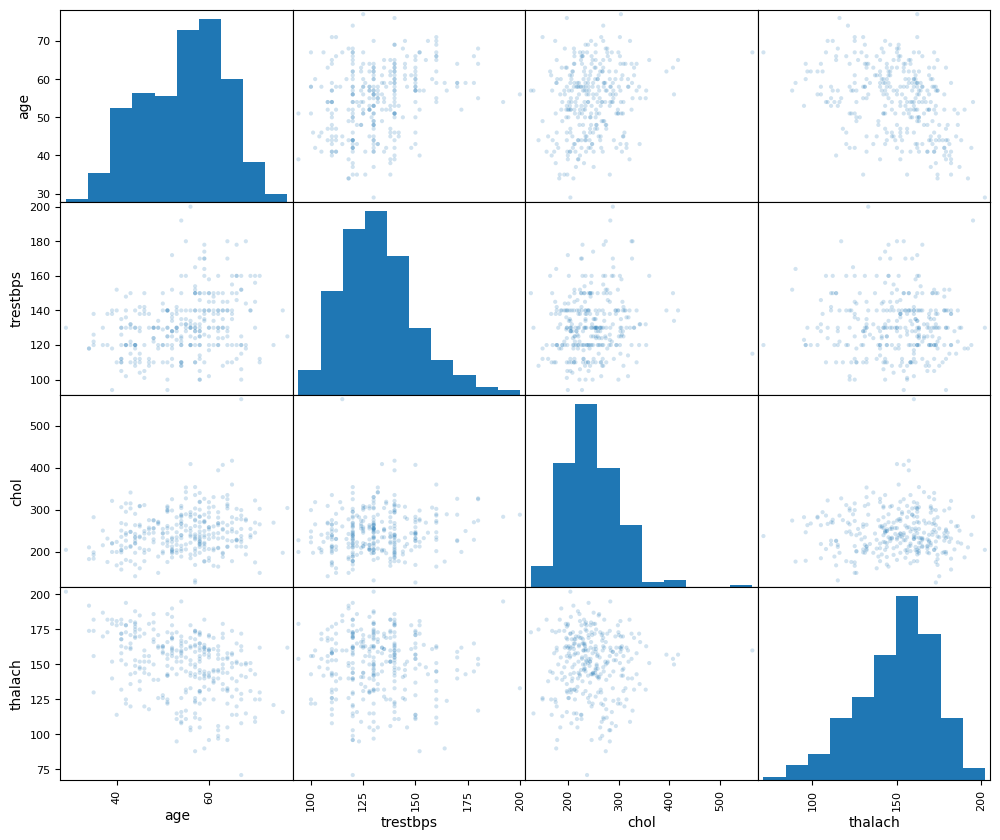

In [61]:
#Exibo apenas algumas variáveis para facilitar a análise
pd.plotting.scatter_matrix(df_cvd[['age','trestbps', 'chol', 'thalach']],
                           alpha=0.2,
                           figsize=(12,10)
                          );

Podemos observar uma relação linear positiva entre idade e pressão arterial em repouso (trestbps), idade e colesterol e uma relação inversa entre idade e thalach. Também observa-se uma relação linear positiva entre trestbps e chol.


In [62]:
tamanho_fatias_cvd = [df_cvd['sex'].value_counts()[0],
                  df_cvd['sex'].value_counts()[1]
                  ]

In [67]:
df_cvd['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [68]:
rotulos_cvd = ['masculino','feminino']

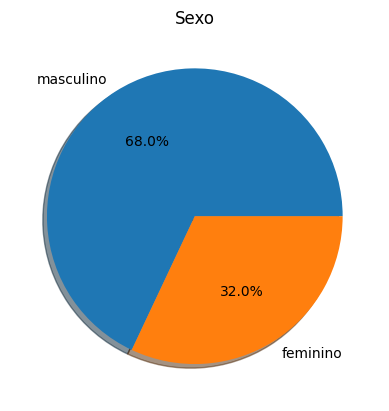

In [69]:
df_cvd['sex'].value_counts() \
            .plot.pie(x=tamanho_fatias_cvd,
                      labels=rotulos_cvd,
                      label = '',
                      title = 'Sexo',
                      autopct = '%1.1f%%',
                      shadow = True
                      );

<Axes: >

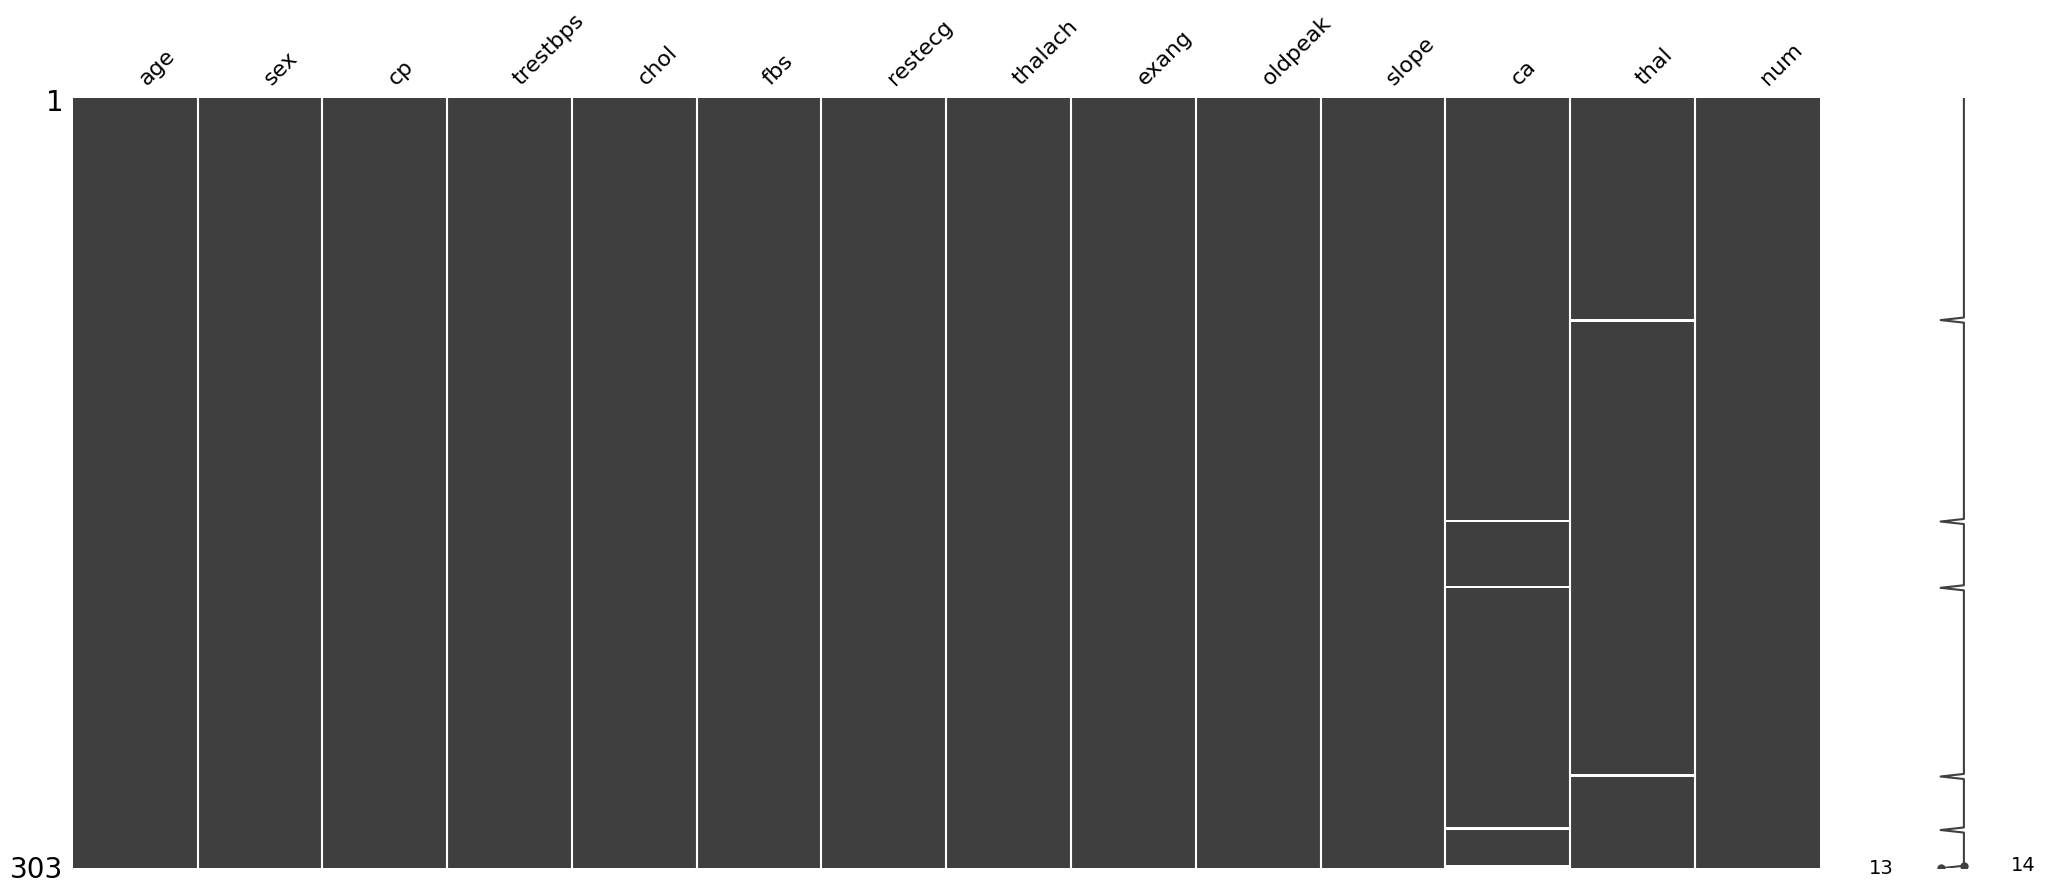

In [70]:
msno.matrix(df_cvd)